<a href="https://colab.research.google.com/github/Sahil-Chhabra-09/Convolution-Neural-Networks/blob/main/Art_Generation_and_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Some special applications of convolutional network

### Face Recognition  

Face verification VS Face recognition

Verification: 
* input is the image and the name/ID
* the goal is to output whether the input image is that of the claimed person
* So, the output is yes/no

Recognition:
* Has a database of K persons
* Get an input image
* Output ID if the image is any of the K persons (or "not recognized")
* Here the output is from 1-K

Liveness detection can be implemented using supervised learning

One-shot learning : One of the challenges of face recognition is to be able to recognize a person given just one single image.

Also, let's say you have 4 employees so your conv net's output will be 5x1 where 1-4 are the employees and 5 is for others

What if another employee joins, we will need to retrain our model and the new output shape will be 6x1.

Instead to make this work, there's something called **"similarity" function**

d(img1, img2) = degree of difference between images

if d(img1, img2) <= Tou => "same"
else => "different"

#### Siamese Network

Let's say the output layer of a conv net on feeding a person's image is of size 128 after some dense layer

Now, these 128 numbers are encoding of the input image 1

What we can do is feed another image to the same network let's say image 2

If we believe that these encodings are good representations of images, then,

d(img1, img2) = norm(encoding2 - encoding 1)

This idea is called siamese network

What we want is for neural network to learn parameters so that:

if x1 and x2 are the same person, norm(f(x1)-f(x2)) is small, and
if x1 and x2 are the diff person, norm(f(x1)-f(x2)) is large

#### Triplet Loss Function

To apply the triplet loss we need to compare pairs of images.

In the terminology of triplet loss, we always look at one anchor image and other image as Positive or Negative depending if they are same or different persons respectively

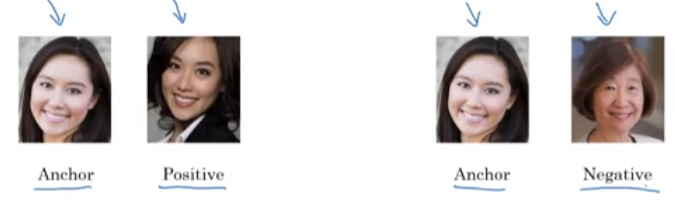

So what we want is

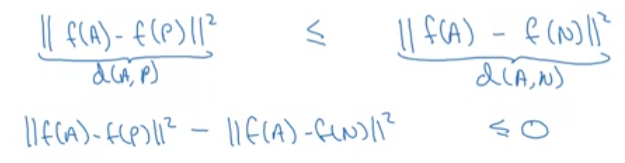

Now, one way to satisfy the equation is if our neural network learns nothing. So, f(A) = 0, f(P) = 0, f(N) = 0 and still the equation will be satisfied

Similarly, another way to satisfy this equation is to set encoding of every image identical to each other

To prevent that, we modify our equation as:

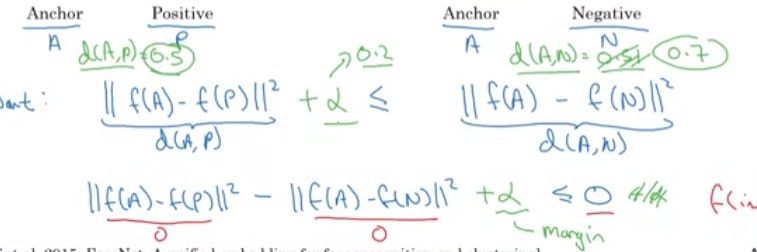

Defining the triplet loss function

Given 3 images, A,P, and N

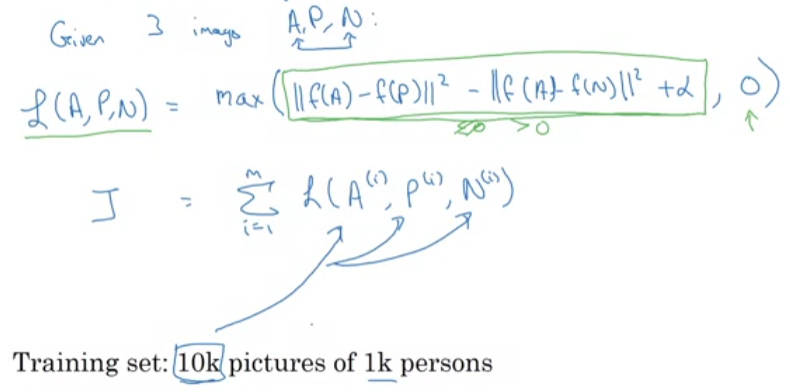

When choosing the triplets A,P and N

choosing them randomly can easily satisfy the equation

but we have to choose triplets that are hard to train on, where the difference between d(A,P) ~ d(A,N)

#### They can also be posed as binary classification problem

An alternative to triple loss function is to treat this as binary classification problem, where the output of comparison between two encodings is 1 if they are the same person and 0 if not

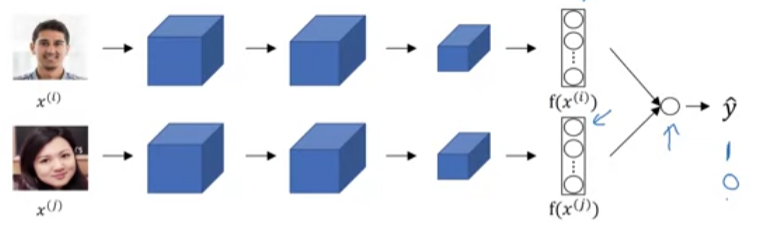

One advantage of this is, we can store these 128 output numbers instead of images, hence we don't need to store images and when a new employ comes in, we can just compute their 128 parameters and easily compare them with the existing ones

To create the training set, we now can just create pairs of images and their target labels as 0 or 1

### Neural Style Transfer

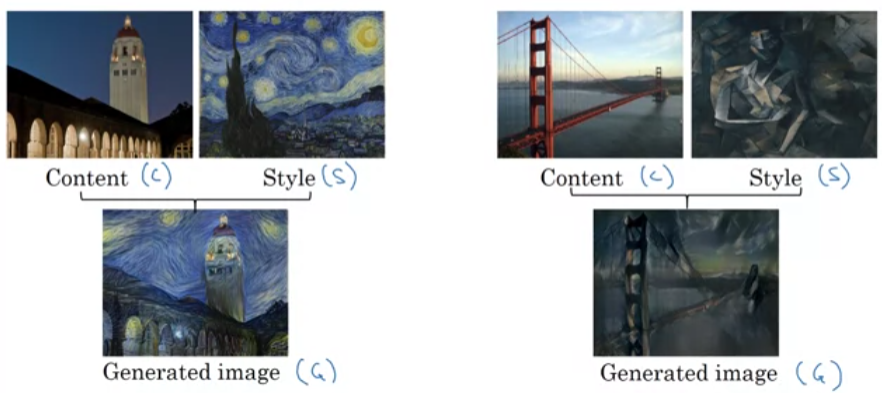